### Description:
In this notebook I will try to EDA the email dates

### Import data and print some rows

In [1]:
import pandas as pd

df = pd.read_csv("enron_test.csv")
print("DF shape:", df.shape)
df.head()

DF shape: (1000, 6)


,Date,From,To,Subject,content,new_date
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'}),NaN,Here is our forecast\n\n,2001-05-14 23:39:00
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'}),Re:,Traveling to have a business meeting takes the...,2001-05-04 20:51:00
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'}),Re: test,test successful. way to go!!!,2000-10-18 10:00:00
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'}),NaN,"Randy,\n\n Can you send me a schedule of the s...",2000-10-23 13:13:00
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,Let's shoot for Tuesday at 11:45.,2000-08-31 12:07:00


In [2]:
# Check if any columns have empty cells

print("Empty cells per column:\n")
for c in df.columns:
    print(c, end=": ")
    print(df[c].isnull().sum())

Empty cells per column:

Date: 0
From: 0
To: 5
Subject: 302
content: 0
new_date: 0


In [3]:
# Create function that converts string dates into date format
# and quick test the function

import datetime
def string_to_date(d):
    return datetime.datetime.strptime(d[:-12], '%a, %d %b %Y %H:%M:%S')

# Test the function
for e in df["Date"].tolist():
    print("Original string date: %s \n" % e)
    
    date_time_obj = string_to_date(e)
    print('Year:', date_time_obj.year)
    print('Month:', date_time_obj.month)
    print('Day:', date_time_obj.day)
    print('Date:', date_time_obj.date())
    print('Time:', date_time_obj.time())
    print('Weekday:', date_time_obj.weekday())
    break


Original string date: Mon, 14 May 2001 16:39:00 -0700 (PDT) 

Year: 2001
Month: 5
Day: 14
Date: 2001-05-14
Time: 16:39:00
Weekday: 0


### Count emails sent every year

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Get count by year

emails_per_year = df["Date"].apply(lambda x: string_to_date(x).year).value_counts()
emails_per_year = emails_per_year.sort_index()

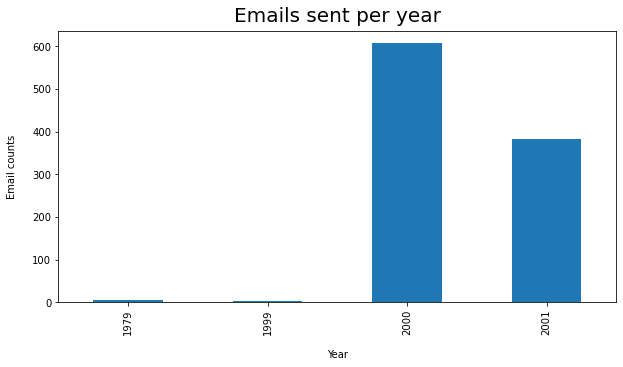

In [6]:
# Plot bar chart

emails_per_year.plot(kind='bar', figsize=(10, 5))
plt.title("Emails sent per year", y=1.01, fontsize=20)
plt.ylabel("Email counts", labelpad=15)
plt.xlabel("Year", labelpad=15);

### Findings:
We can see that emails were being sent actively in 2000 and 2001

### Count emails sent every  month

In [7]:
# Get counts by months

emails_monthly = df["Date"].apply(lambda x: string_to_date(x).month).value_counts()
emails_monthly = emails_monthly.sort_index()

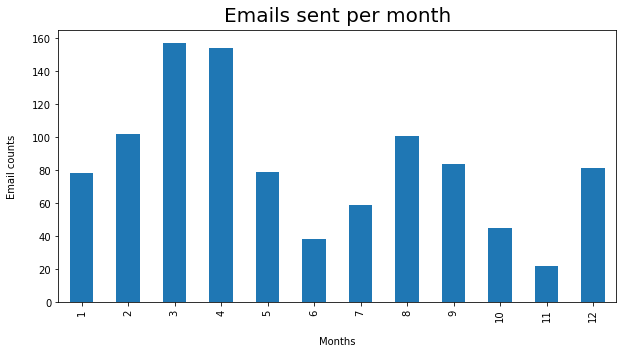

In [8]:
# Plot bar chart

emails_monthly.plot(kind='bar', figsize=(10, 5))
plt.title("Emails sent per month", y=1.01, fontsize=20)
plt.ylabel("Email counts", labelpad=15)
plt.xlabel("Months", labelpad=15);

### Findings:
I think the char above also shows some pattern. We can see that chart looks like sinusoid (i.e wavy),
where peaks could indicate busy seasons. And the activation of the seasons starts and ends smoothly. And also teh busiest time is the beginning of the year.

### Count emails sent every  month day

In [9]:
# Get count by month days

emails_month_days = df["Date"].apply(lambda x: string_to_date(x).day).value_counts()
emails_month_days = emails_month_days.sort_index()

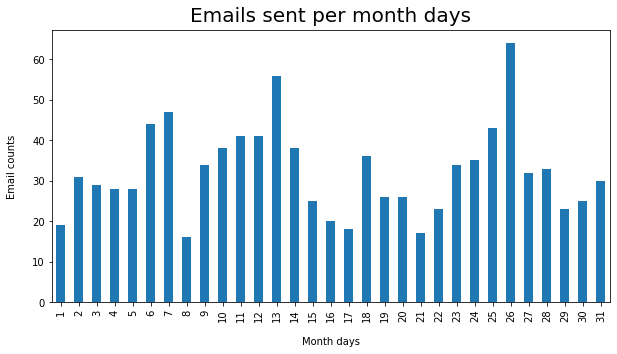

In [10]:
# Plot bar chart

emails_month_days.plot(kind='bar', figsize=(10, 5))
plt.title("Emails sent per month days", y=1.01, fontsize=20)
plt.ylabel("Email counts", labelpad=15)
plt.xlabel("Month days", labelpad=15);

### Findings:
Looks like the chart above also looks like a bit wavy (but the waves are noisy), so there is a weak pattern as well. Might require more investigation.

### Count emails sent every weekday

In [11]:
# Get count by week days

emails_week_days = df["Date"].apply(lambda x: string_to_date(x).weekday()).value_counts()
emails_week_days = emails_week_days.sort_index()

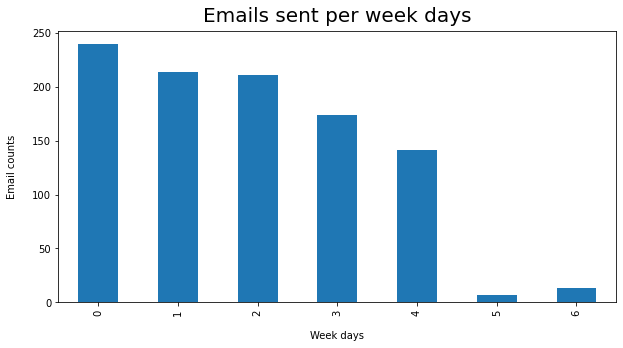

In [12]:
# Plot bar chart

emails_week_days.plot(kind='bar', figsize=(10, 5))
plt.title("Emails sent per week days", y=1.01, fontsize=20)
plt.ylabel("Email counts", labelpad=15)
plt.xlabel("Week days", labelpad=15);

### Findings:
So the week days are indicated as numbers where 0 is Monday and 6 is Sunday. Looks like an obvious pattern where start of the weeks starts aggressively active and slows down gradually and weekends are weekends where activity is the slowest. It's possible that weekend emails are sent by people with cretain ranks or from certain departments/companies and vice versa.

### Additional thoughts:
All the charts above where we checked count emails sent in different time buckets (year, month, days) might be useful to optimize company resourses according to busyness